In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load the dataset for a single crop
file_path = "FinalDatasets/BARLEY_data_merged.csv"
data = pd.read_csv(file_path)

In [22]:
# One-hot encode the DISTRICT_NAME column
data = pd.get_dummies(data, columns=['DISTRICT_NAME'], prefix='DISTRICT', drop_first=True)

In [23]:
# Preprocess the dataset
# Drop unused columns and separate features (X) and target (y)
X = data.drop(columns=['YEAR', 'CROP_TYPE','PRODUCTION'])
y = data['PRODUCTION']

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Preprocessing: Scale features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Train SVR Model
svr_model = SVR(kernel='linear', C=np.sqrt(y.size), epsilon=0.1)  # Adjust hyperparameters as needed
svr_model.fit(X_train_scaled, y_train)

SVR(C=10.0, kernel='linear')

In [38]:
# Predictions
y_pred_lr = lr_model.predict(X_test)
# prediction for random forest
y_pred_rf = rf_model.predict(X_test)
# Predictions for SVR
y_pred_svr = svr_model.predict(X_test_scaled)

In [ ]:

# Evaluation Metrics
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Model:")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.2f}\n")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Support Vector Regression", y_test, y_pred_svr)

Linear Regression Model:
  MAE: 109.68
  RMSE: 265.90
  R²: 0.87

Random Forest Model:
  MAE: 94.90
  RMSE: 271.23
  R²: 0.86

Support Vector Regression Model:
  MAE: 90.10
  RMSE: 247.50
  R²: 0.88



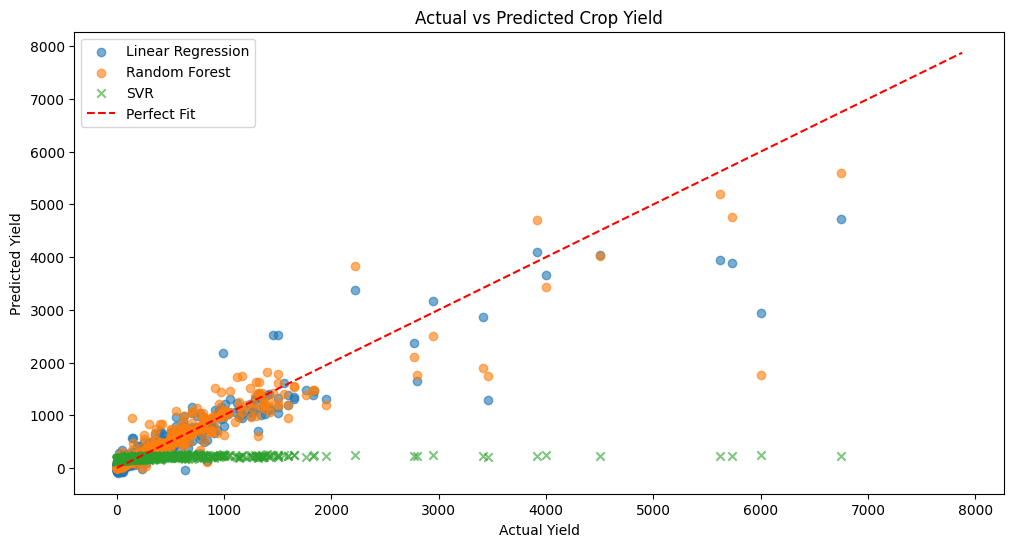

In [31]:
# Visualizations
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.6)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.6)
plt.scatter(y_test, y_pred_svr, label='SVR', alpha=0.6, marker='x')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red', label='Perfect Fit')
plt.title('Actual vs Predicted Crop Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()
plt.show()


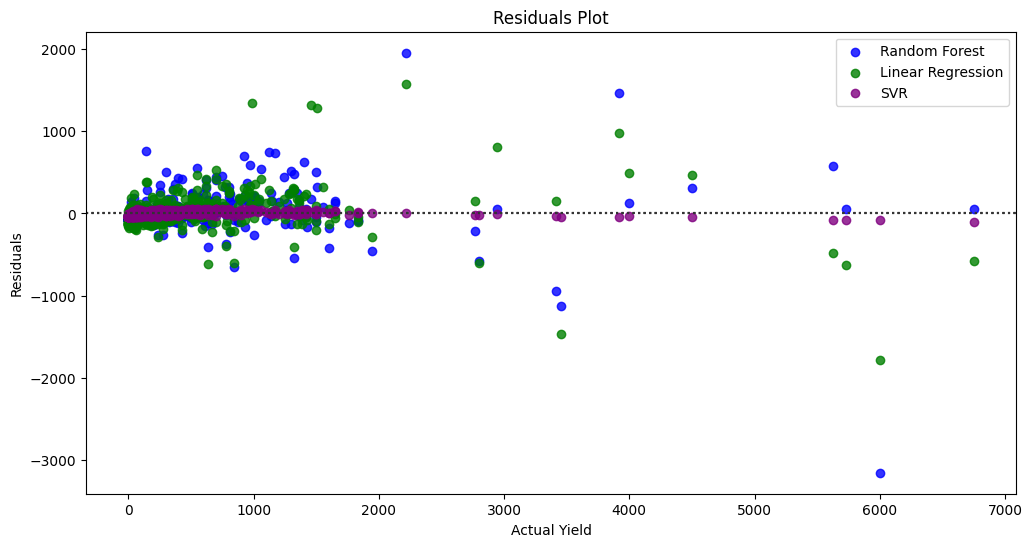

In [32]:
# Residuals Plot
plt.figure(figsize=(12, 6))
sns.residplot(x=y_test, y=y_pred_rf, color='blue', label='Random Forest')
sns.residplot(x=y_test, y=y_pred_lr, color='green', label='Linear Regression')
sns.residplot(x=y_test, y=y_pred_svr, color='purple', label='SVR')
plt.title('Residuals Plot')
plt.xlabel('Actual Yield')
plt.ylabel('Residuals')
plt.legend()
plt.show()

C:\Users\aayus\AppData\Local\Temp\ipykernel_12188\2968497732.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


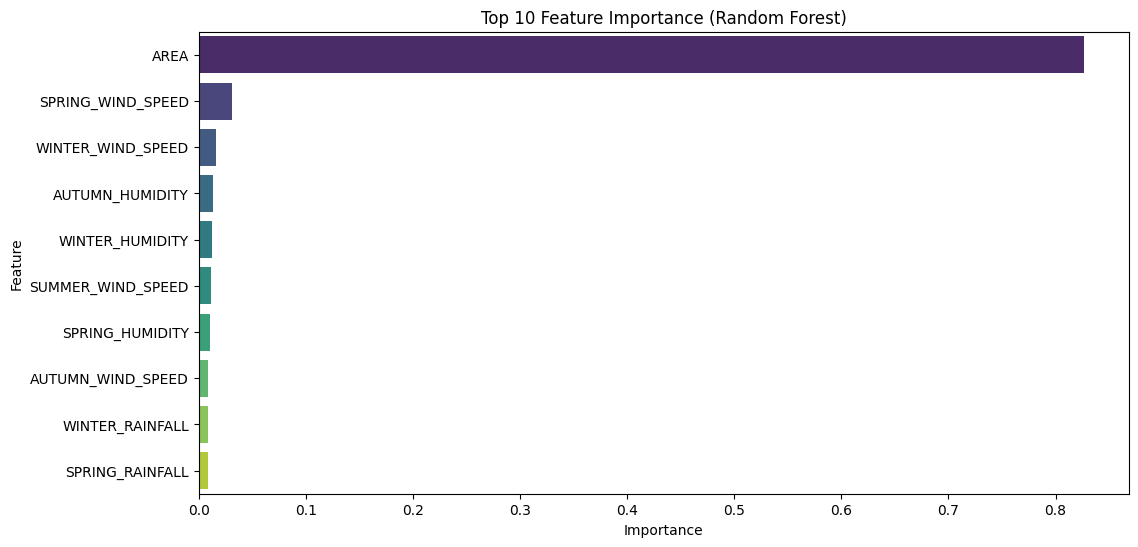

In [33]:
# Feature Importance (Random Forest)
feature_importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)  # Show top 10 features

# Plot the top features
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
